In [1]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from natsort import natsorted

In [4]:
# Set the path to the directory containing the image stacks
stack_dir = 'D:/Soil_Images/RAW_2023-08-15/Stacks'

# Get a list of all TIFF files in the input directory
files = [f for f in os.listdir(stack_dir) if f.endswith('.tiff')]
print(files)

green_stack = tifffile.imread(os.path.join(stack_dir, files[1]))
red_stack = tifffile.imread(os.path.join(stack_dir, files[2]))
blue_stack = tifffile.imread(os.path.join(stack_dir, files[0]))

#Get length of image stacks
num_images_green = len(green_stack)
num_images_red = len(red_stack)
num_images_blue = len(blue_stack)
if num_images_green == num_images_red and num_images_blue:
    print("Equal stacks")    
else:
    print("unequal stacks")

num_images = num_images_green
print("stack=",num_images)

['stacked_blue_channel.tiff', 'stacked_green_channel.tiff', 'stacked_red_channel.tiff']
Equal stacks
stack= 36


In [6]:
#Loop through all red/blue pairs of images in the stacks an get the RED/GREEN intensity ratio
mean_red_intensity =[]
mean_green_intensity = []
mean_blue_intensity = []
std_red_intensity = []
std_green_intensity = []
std_blue_intensity =[]
red_green_ratio = []
mean_red_green_ratio =[]
red_green_std = []

for i in range(num_images):

    mean_red_intensity.append(np.mean(red_stack[i]))
    mean_green_intensity.append(np.mean(green_stack[i]))
    mean_blue_intensity.append(np.mean(blue_stack[i]))
    std_red_intensity.append(np.std(red_stack[i]))
    std_green_intensity.append(np.std(green_stack[i]))
    std_blue_intensity.append(np.std(blue_stack[i]))

    # Calculate the intensity ratio between the two images
    ratio = red_stack[i] / green_stack[i]
    mean_red_green_ratio.append(np.mean(ratio))
    red_green_ratio.append(ratio)
    red_green_std.append(np.std(ratio))


In [27]:
#Define number of sections for each image to calculate mean ratios
num_sections = 3

# Calculate the height of each section
section_height = red_stack.shape[1] // num_sections

# Loop over eack image in the ratio stack and divide it into sections
ratio_section_means = []
ratio_sections = []

for image in red_green_ratio:
    sections = [image[i*section_height:(i+1)*section_height, :] for i in range(num_sections)]
    ratio_sections.append(sections)

    # Calculate the mean ratio of eacjh section and append it to the list
    ratio_section_mean = [np.nanmean(section) for section in sections]
    ratio_section_means.append(ratio_section_mean)

# Reshape array of mean ratios to 
ratio_section_means = np.reshape(ratio_section_means, (-1, num_sections))
print(ratio_section_means)

[[1.86641097 1.8883853  1.89948558]
 [1.66066157 1.6805119  1.69290637]
 [1.51508461 1.53140015 1.54109595]
 [1.40573307 1.42068382 1.42980275]
 [1.32405637 1.33670355 1.34475825]
 [1.26153146 1.27349867 1.28118094]
 [1.20654404 1.21659336 1.22370071]
 [1.15944405 1.16774844 1.17438236]
 [1.12306404 1.13026799 1.13631402]
 [1.09016584 1.09658852 1.10209437]
 [1.05188927 1.0580625  1.06264255]
 [1.86705303 1.88897692 1.89974672]
 [1.65899514 1.67863275 1.69024861]
 [1.51586537 1.5325747  1.54190906]
 [1.40579876 1.42048578 1.42880591]
 [1.32261643 1.33521058 1.34383114]
 [1.26191257 1.27346868 1.28128146]
 [1.20464217 1.21492394 1.2215722 ]
 [1.15873906 1.16707724 1.17355497]
 [1.12241743 1.12958758 1.13561963]
 [1.08972124 1.09627761 1.10191378]
 [1.05195516 1.05814261 1.06265582]
 [1.86773178 1.88957414 1.90047014]
 [1.65728279 1.6769868  1.68824199]
 [1.51492818 1.53107629 1.5404586 ]
 [1.40539541 1.42003175 1.4283651 ]
 [1.3217523  1.33406466 1.34269235]
 [1.26157271 1.2729929  1.28

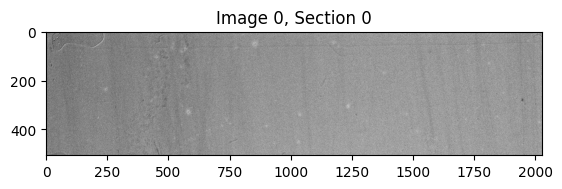

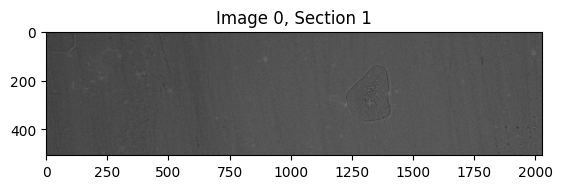

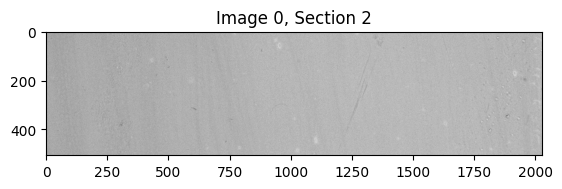

In [28]:
# Define the image index to show
image_idx = 0

# Get an example image from the green stack and its sections to see how its divided
image = red_stack[image_idx]
sections = ratio_sections[image_idx]

for section_idx in range(num_sections):
    section = sections[section_idx]
    plt.imshow(section, cmap="gray")
    plt.title(f'Image {image_idx}, Section {section_idx}')
    plt.show()


In [29]:
# Calculate the mean of means for each image and the standard deviation
ratio_mean_of_means = []
ratio_std_of_means =[]

for i in range(len(ratio_section_means)):
    mean_ratio = np.nanmean(ratio_section_means[i])
    std_ratio = np.nanstd(ratio_section_means[i])
    ratio_mean_of_means.append(mean_ratio)
    ratio_std_of_means.append(std_ratio)

print(ratio_mean_of_means)
print(ratio_std_of_means)

[1.8847606172553026, 1.6780266131382202, 1.52919357298095, 1.4187398773833024, 1.3351727248914766, 1.272070354952482, 1.2156127035451554, 1.1671916192834624, 1.1298820161925853, 1.0962829125587197, 1.0575314390398567, 1.885258887598711, 1.6759588315314573, 1.5301163754766678, 1.418363484527686, 1.3338860505326309, 1.2722209037684589, 1.2137127711989786, 1.166457089407724, 1.1292082122909939, 1.0959708771091587, 1.0575845308913365, 1.885925350847094, 1.674170527215925, 1.5288210208708197, 1.4179307554509268, 1.3328364346415864, 1.2718507837145736, 1.2122919772121417, 1.165752052774452, 1.1288071161764686, 1.0957738909478045, 1.0575619186587035]
[0.013743751985532987, 0.01328067011616434, 0.010733100975810006, 0.009922081745162651, 0.008520544562410465, 0.008085196627162446, 0.007038424866290043, 0.006111235465640007, 0.005416160879715656, 0.004874595755500526, 0.004406041451458919, 0.01360360757690029, 0.012898508645588376, 0.010773454892166608, 0.009511757751417287, 0.00871136269000629

In [30]:
# Set the path to the directory containing the image filenames
files_dir = 'D:/O2_Calibration_Images/RAW_2023-08-14/'
files = [f for f in os.listdir(files_dir) if f.endswith('.tiff')]

# Sort filenames to match with stack index
files = natsorted(files)

# Initialize an empty dataframe
df_ratios = pd.DataFrame(columns=['Temperature/O2', 'Intensity Ratio', 'Intensity Red', 'Intensity Green', 'Intensity Blue', 'Std Ratio','Std Red','Std Green', 'Std Blue'])

# Add filenames and corresponding red/green ratio to the dataframe
for i in range(num_images):
    ratio_df = ratio_mean_of_means[i]
    std_df = ratio_std_of_means[i]
    blue_intensity = mean_blue_intensity[i]
    green_intensity = mean_green_intensity[i]
    red_intensity = mean_red_intensity[i]
    blue_std = std_blue_intensity[i]
    green_std = std_green_intensity[i]
    red_std = std_red_intensity[i]
    filename = os.path.splitext(files[i])[0][24:]
    numeric_num = float(filename.replace(",", ".")) 
    df_ratios.loc[i] = [numeric_num, ratio_df, red_intensity, green_intensity, blue_intensity, std_df, red_std, green_std, blue_std]

#df_ratios['Intensity Ratio'] = df_ratios['Intensity Ratio'].round(4)

# Print the dataframe
print(df_ratios)

    Temperature/O2  Intensity Ratio  Intensity Red  Intensity Green  \
0              0.0         1.884761    2318.925648      1229.530458   
1              9.5         1.678027    1905.795801      1135.056447   
2             19.3         1.529194    1647.519776      1076.834242   
3             29.6         1.418740    1471.228756      1036.517262   
4             39.9         1.335173    1346.660882      1008.214512   
5             49.5         1.272070    1257.549034       988.235101   
6             60.3         1.215613    1183.009586       972.897383   
7             70.7         1.167192    1119.838224       959.183781   
8             80.2         1.129882    1067.751984       944.819785   
9             90.0         1.096283    1025.948318       935.688683   
10           100.0         1.057531     981.896512       928.367288   
11             0.0         1.885259    2322.420218      1231.054511   
12             9.5         1.675959    1909.369954      1138.596523   
13    

In [14]:
#Save the DataFrame as a CSV file
df_ratios.to_csv('D:/O2_Calibration_Images/RAW_2023-08-14/red_green_ratio.csv',header=True, index=False, decimal=',')